In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from gpp.world_models_vae import ConvVAE

os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # can just override for multi-gpu systems
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)


In [3]:
z_size = 16
batch_size = 32
kl_tolerance = 0.5
learning_rate = 0.001
data_path = "data"
dataset = np.load(os.path.join(data_path, 'push_sphere_v0_imgs.npz'))
dataset = dataset['arr_0']
np.random.shuffle(dataset)
dataset = dataset / 255.
new_data = []
for i, d in enumerate(dataset):
    new_data.append(cv2.resize(d, (64, 64), interpolation=cv2.INTER_AREA))
dataset = np.array(new_data)
print("done")


done


In [17]:
%matplotlib inline
print(dataset.shape)
# pic_sums = np.sum(dataset, axis=(1, 2, 3))
# small_pic_idx = np.where(pic_sums < 8000)[0]
# print(small_pic_idx)
# print(dataset.shape)
# new_dataset = np.delete(dataset, small_pic_idx, axis=0)
# np.savez_compressed('DATASETNAME', new_dataset * 255.)
# print(new_dataset.shape)

(6400, 64, 64, 3)
[  70  118  298  504  518  831  960  972 1144 1379 1499 1548 1584 1630 1679 1804 1836 2325 2403
 2467 2516 2519 2706 2802 2855 2906 3070 3312 3387 3412 3466 3548 3613 3753 3754 3837 3864 3881
 3984 4179 4208 4307 4358 4369 4571 4596 4697 5271 5407 5411 5509 5635 5650 5868 5998 6135 6193
 6270]
(6400, 64, 64, 3)


(6342, 64, 64, 3)


In [6]:
z_size = 16
batch_size = 32
kl_tolerance = 0.5
learning_rate = 0.001
vae = ConvVAE(z_size=z_size, batch_size=batch_size, learning_rate=learning_rate, kl_tolerance=kl_tolerance,
              is_training=True, reuse=False, gpu_mode=False, reconstruction_option=1,
              kl_option=2)
# vae.load_json("best_models/kl2-rl1-b10vae-fetch950.json")
vae.load_json("scripts/best_models/superModels/kl2rl1-z16-b600-push_sphere_v0vae-fetch199.json")

INFO:tensorflow:Model using cpu.


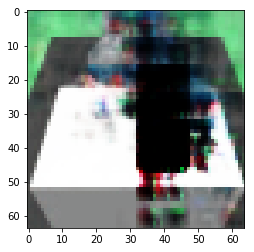

interactive(children=(FloatSlider(value=0.7694226503372192, description='w1', max=1.6475629806518555, min=-1.9…

<function __main__.update(w1=1.0, w2=1.0, w3=1.0, w4=1.0, w5=1.0, w6=1.0, w7=1.0, w8=1.0)>

In [10]:
""" THIS THING IS NOT WORKING. SEE NEXT CELLS FOR PLOTS"""
z = vae.encode(dataset[:batch_size])
reconstruct = vae.decode(z)
pic = reconstruct[0]

fig, ax = plt.subplots()
im = ax.imshow(pic)


def update(w1=1.0, w2=1.0, w3=1.0, w4=1.0, w5=1.0, w6=1.0, w7=1.0, w8=1.0):
    weights = np.array([w1, w2, w3, w4, w5, w6, w7, w8])
    z[0][:8] = weights
    reconstruct = vae.decode(z)
    im = ax.imshow(reconstruct[0])
    
# freq = widgets.FloatSlider(value=7.5, min=1, max=5.0, step=0.5)
maxes = z.max(axis=0)
mins = z.min(axis=0)
interact(update, 
         w1= widgets.FloatSlider(value=z[0][0], min=mins[0], max=maxes[0],step=0.1), 
         w2=widgets.FloatSlider(value=z[0][1], min=mins[1], max=maxes[1], step=0.1), 
         w3=widgets.FloatSlider(value=z[0][2], min=mins[2], max=maxes[2], step=0.1), 
         w4=widgets.FloatSlider(value=z[0][3], min=mins[3], max=maxes[3], step=0.1), 
         w5=widgets.FloatSlider(value=z[0][4], min=mins[4], max=maxes[4], step=0.1), 
         w6=widgets.FloatSlider(value=z[0][5], min=mins[5], max=maxes[5], step=0.1), 
         w7=widgets.FloatSlider(value=z[0][6], min=mins[6], max=maxes[6], step=0.1), 
         w8=widgets.FloatSlider(value=z[0][7], min=mins[7], max=maxes[7], step=0.1), 
)


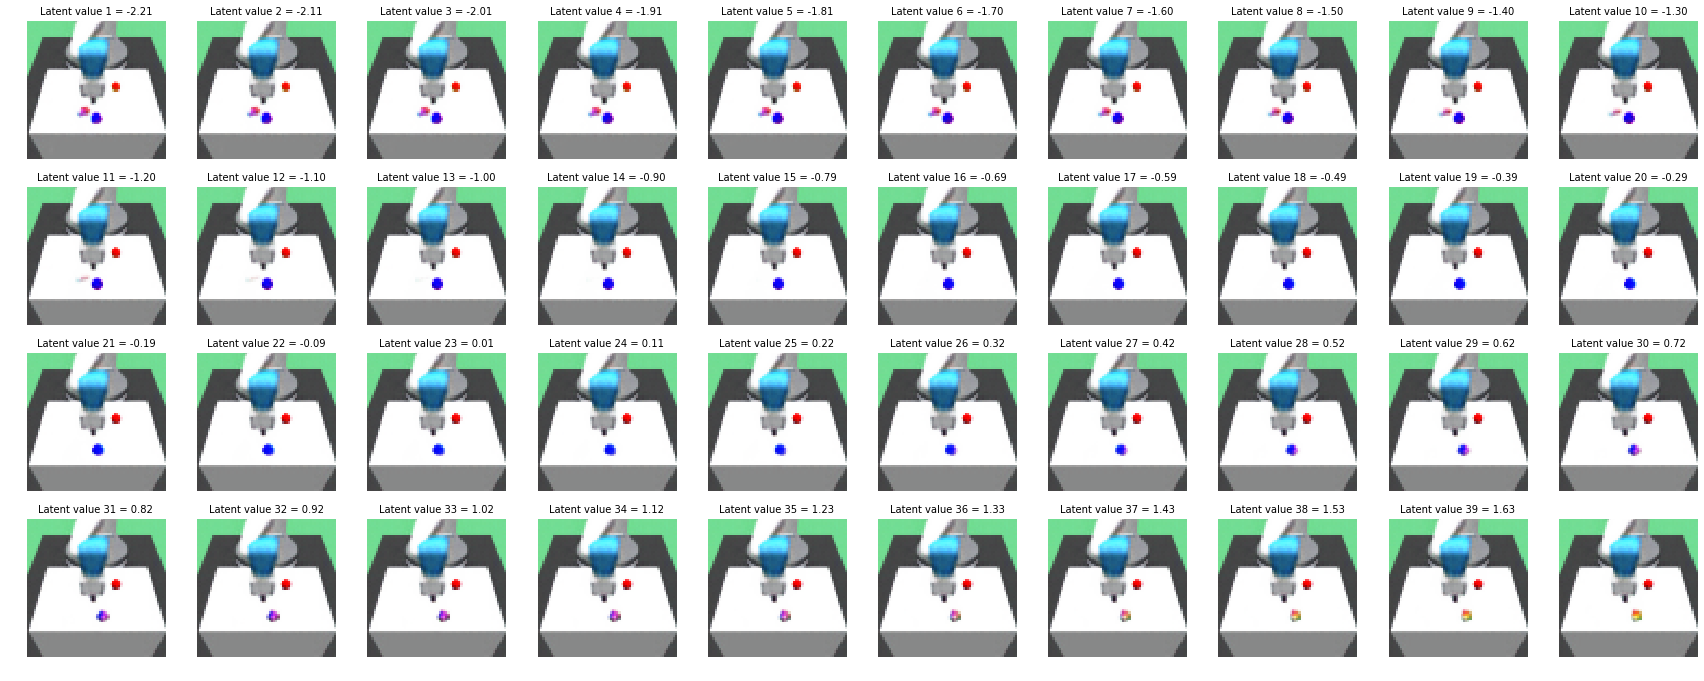

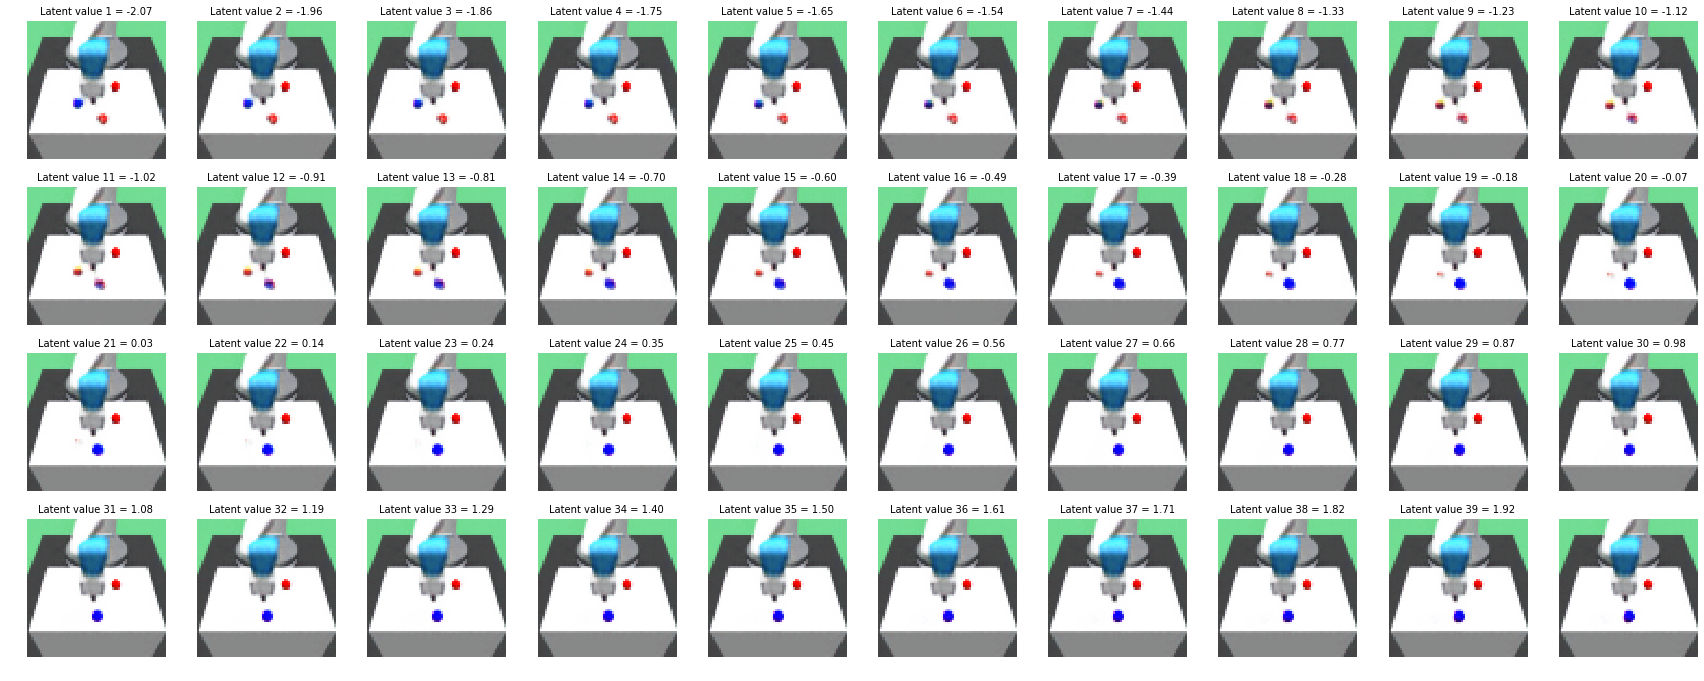

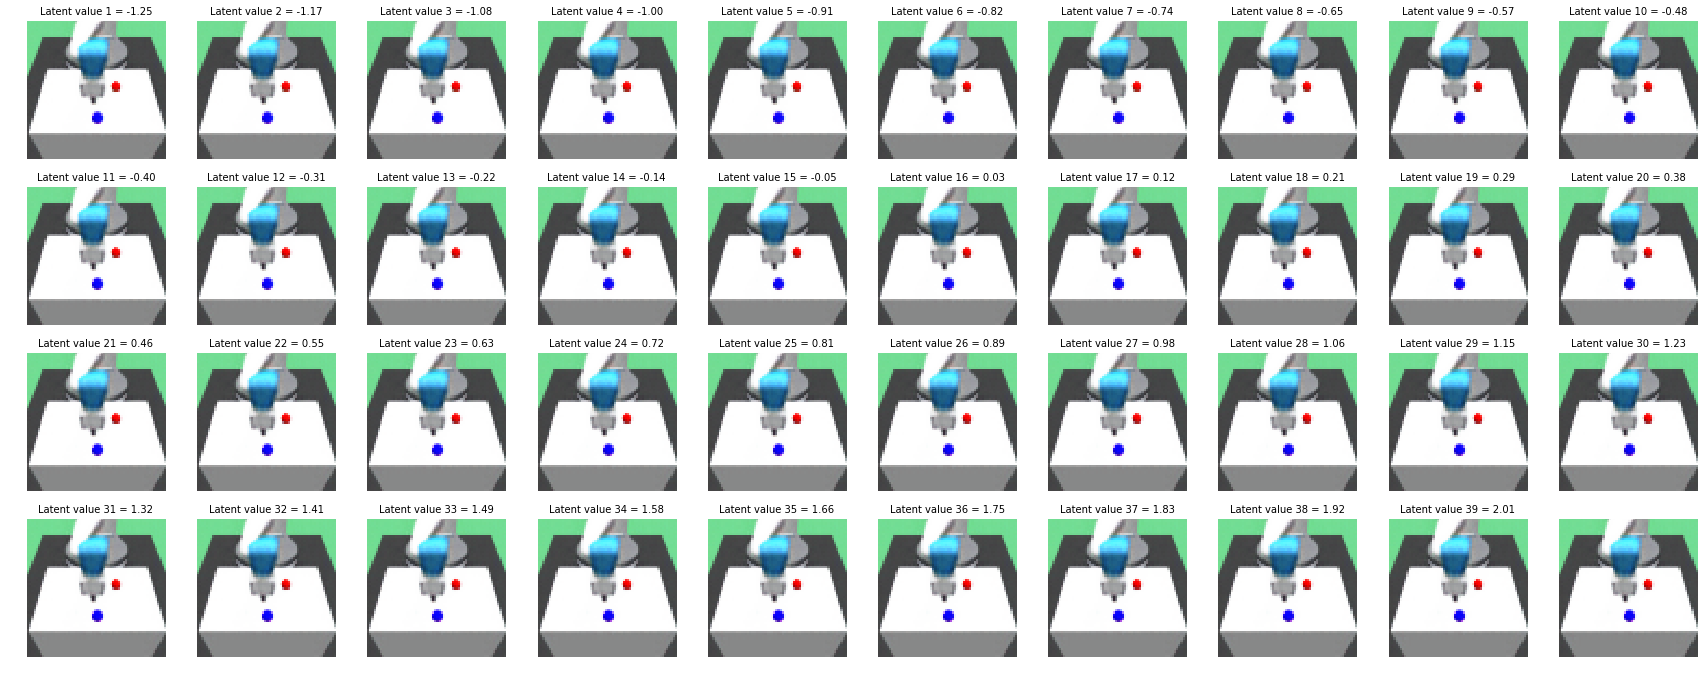

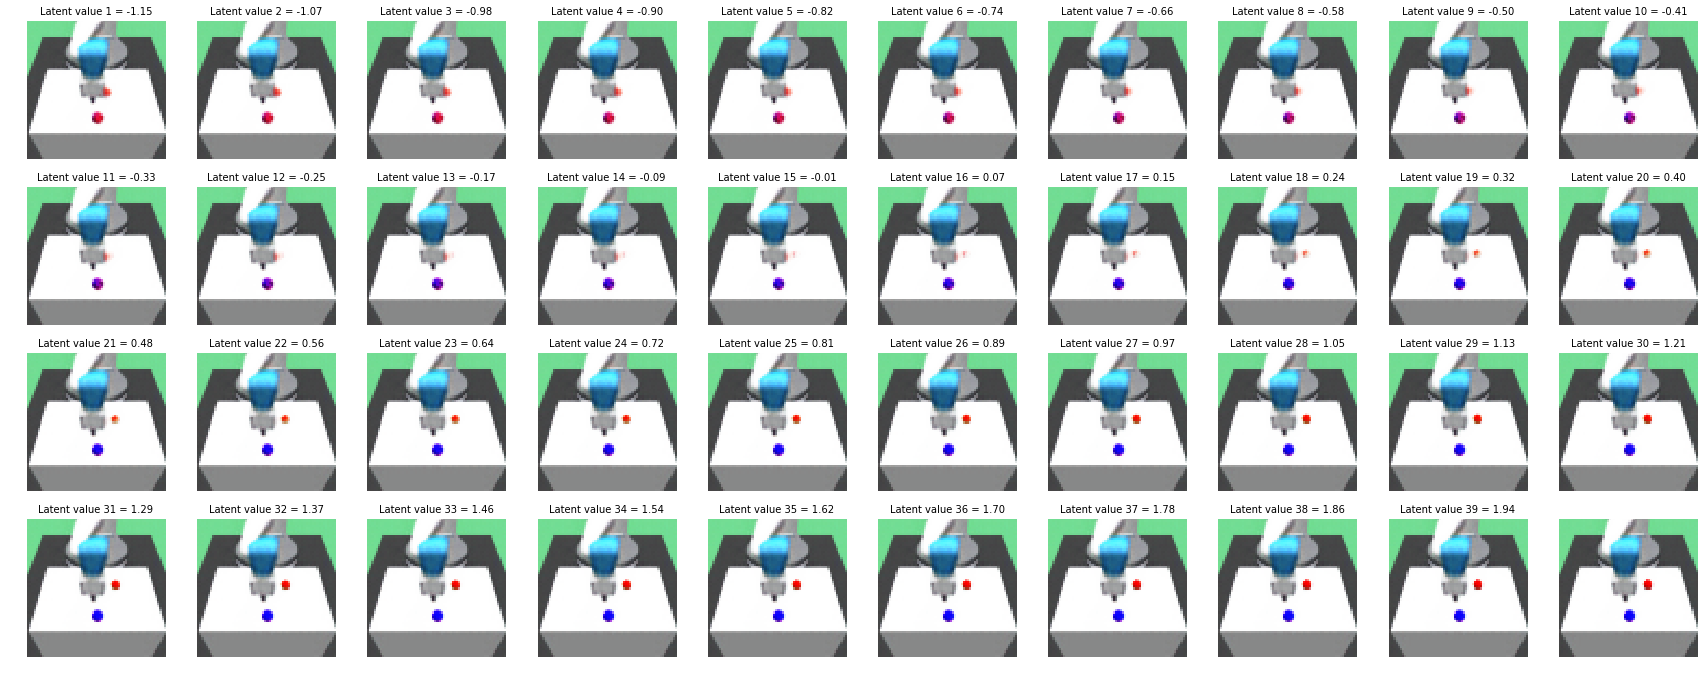

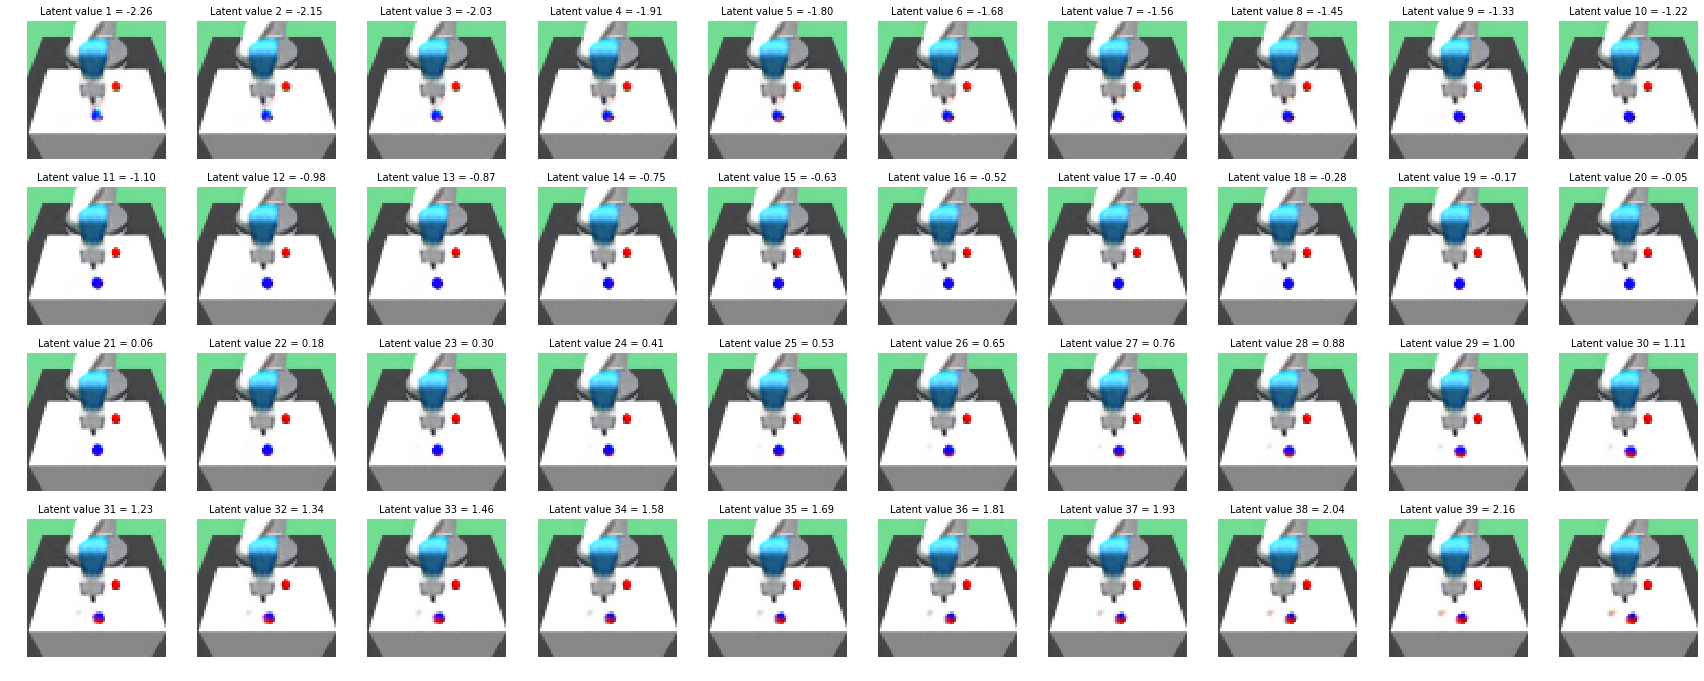

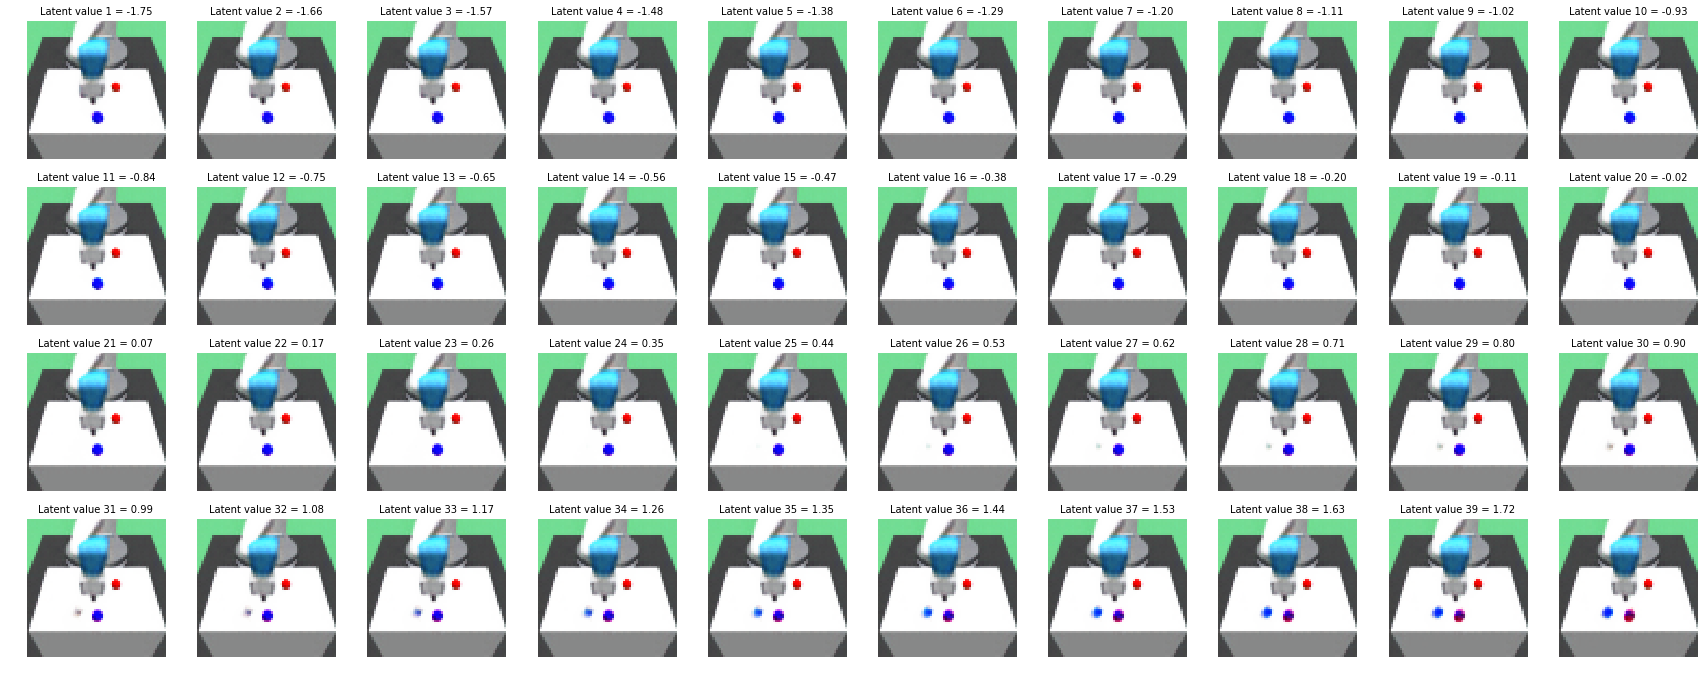

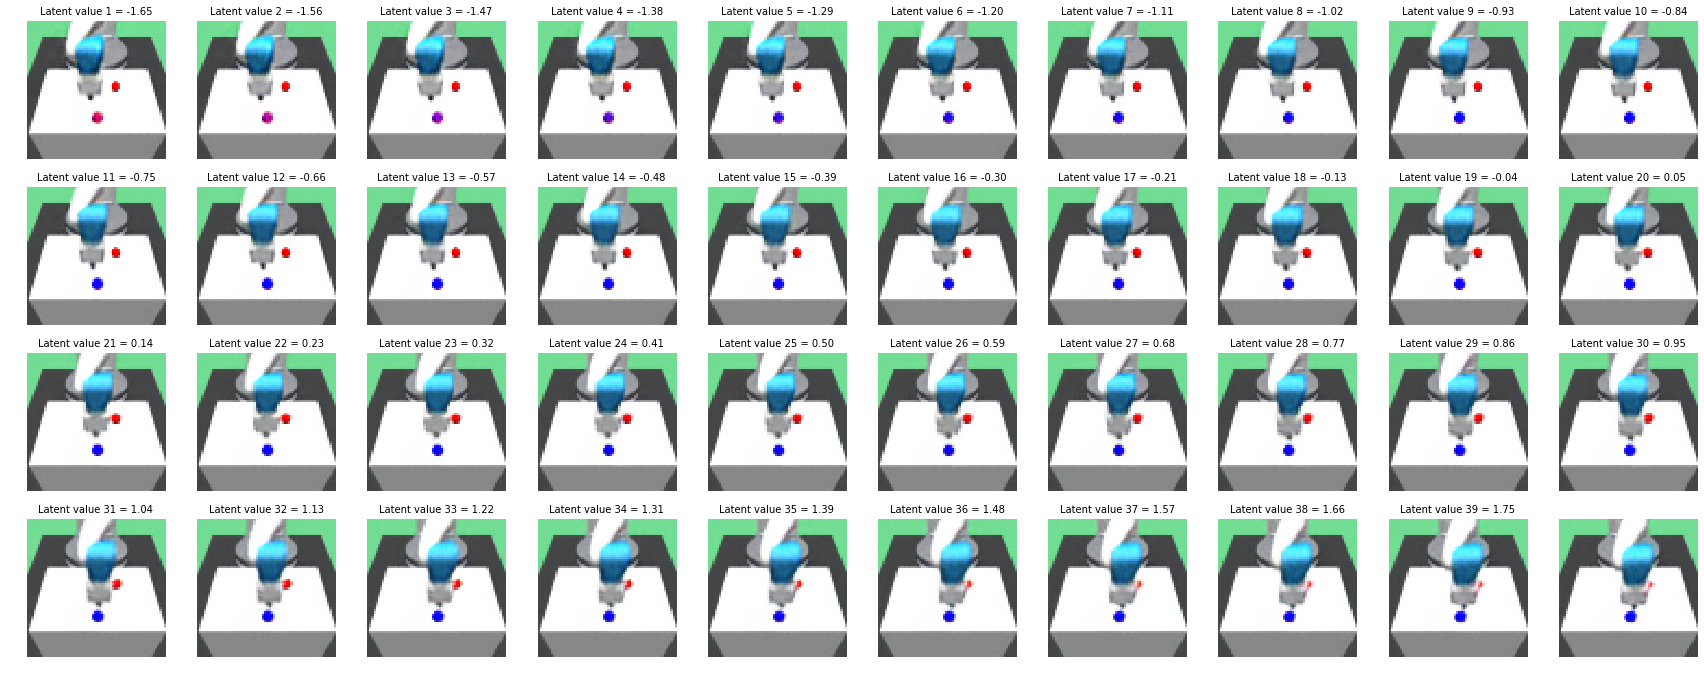

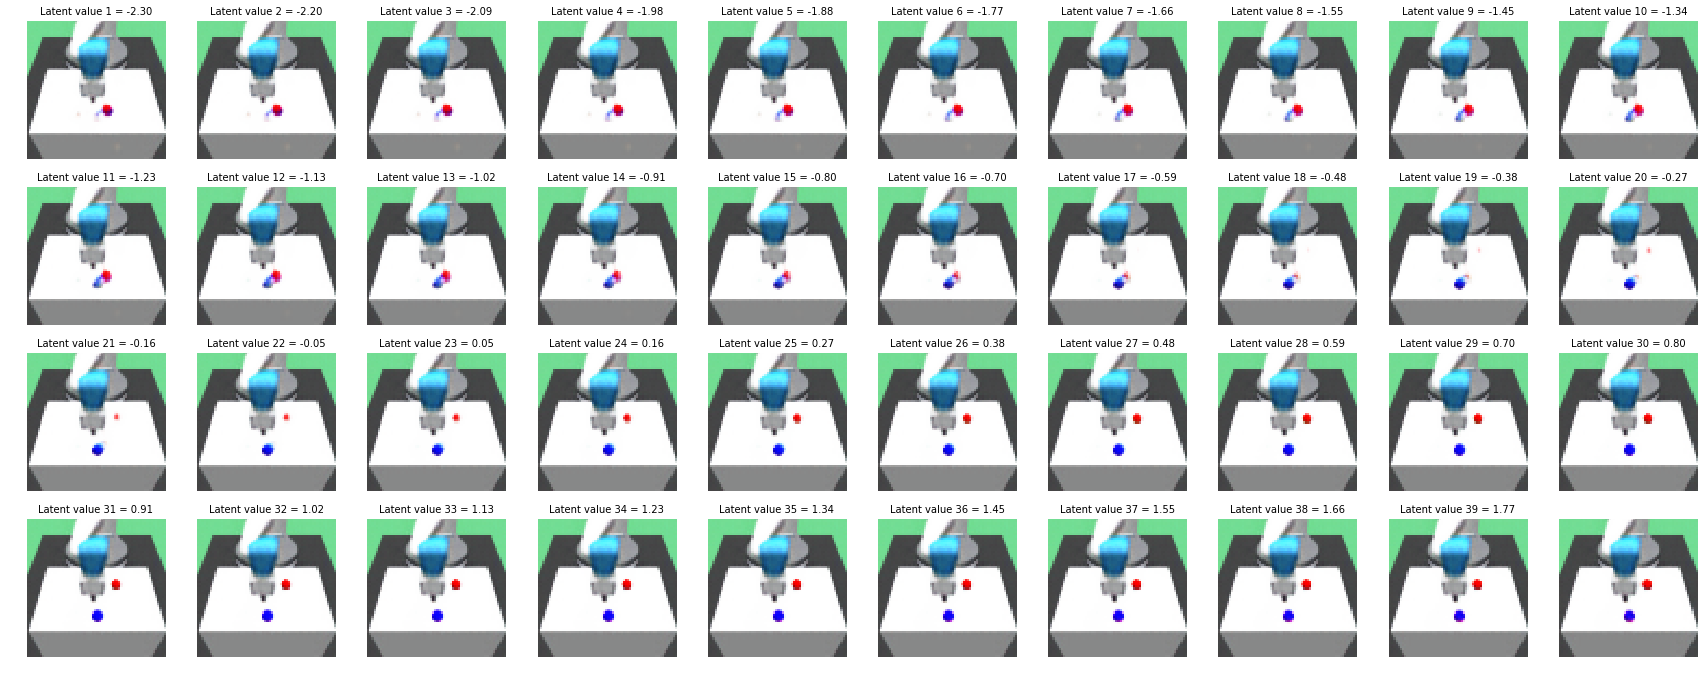

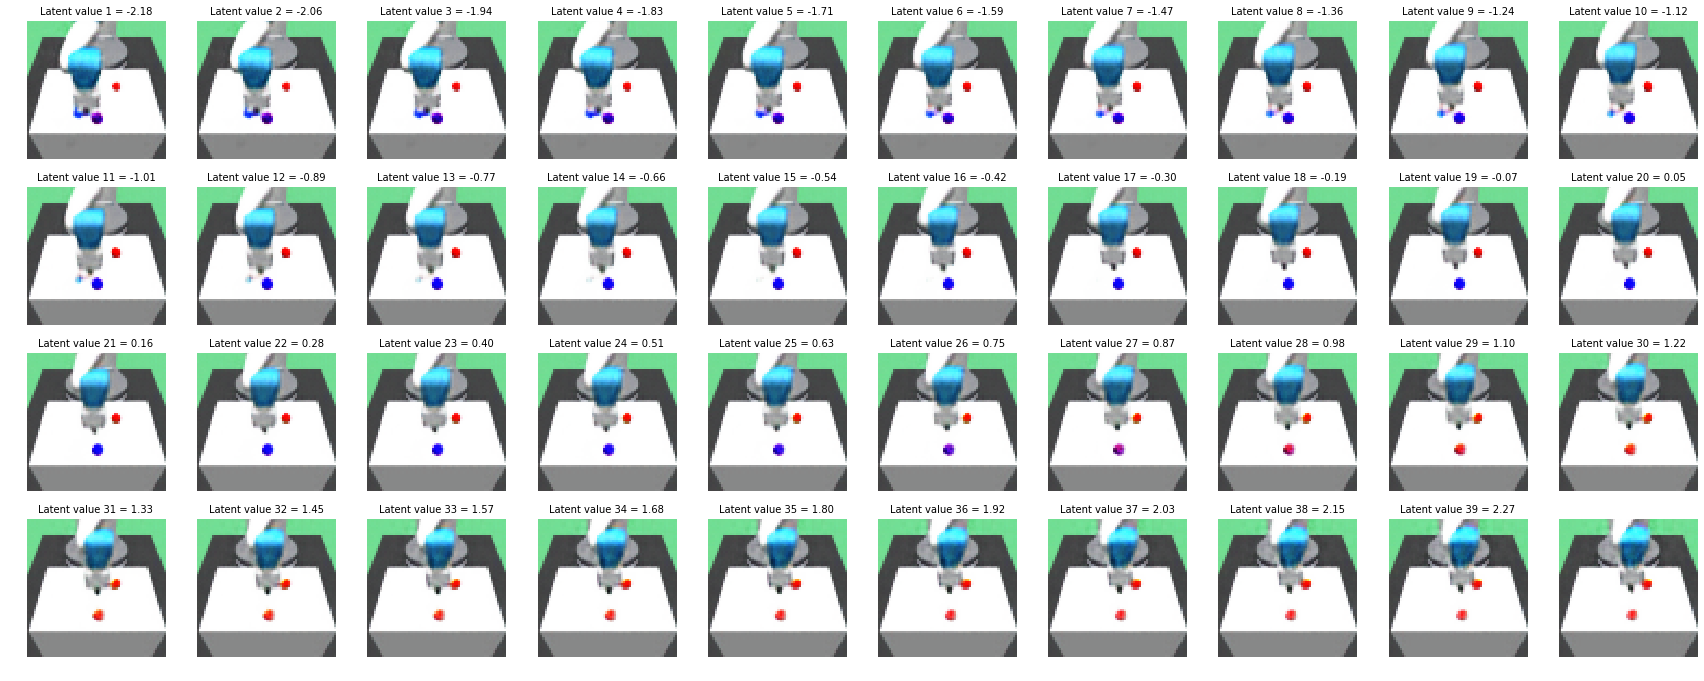

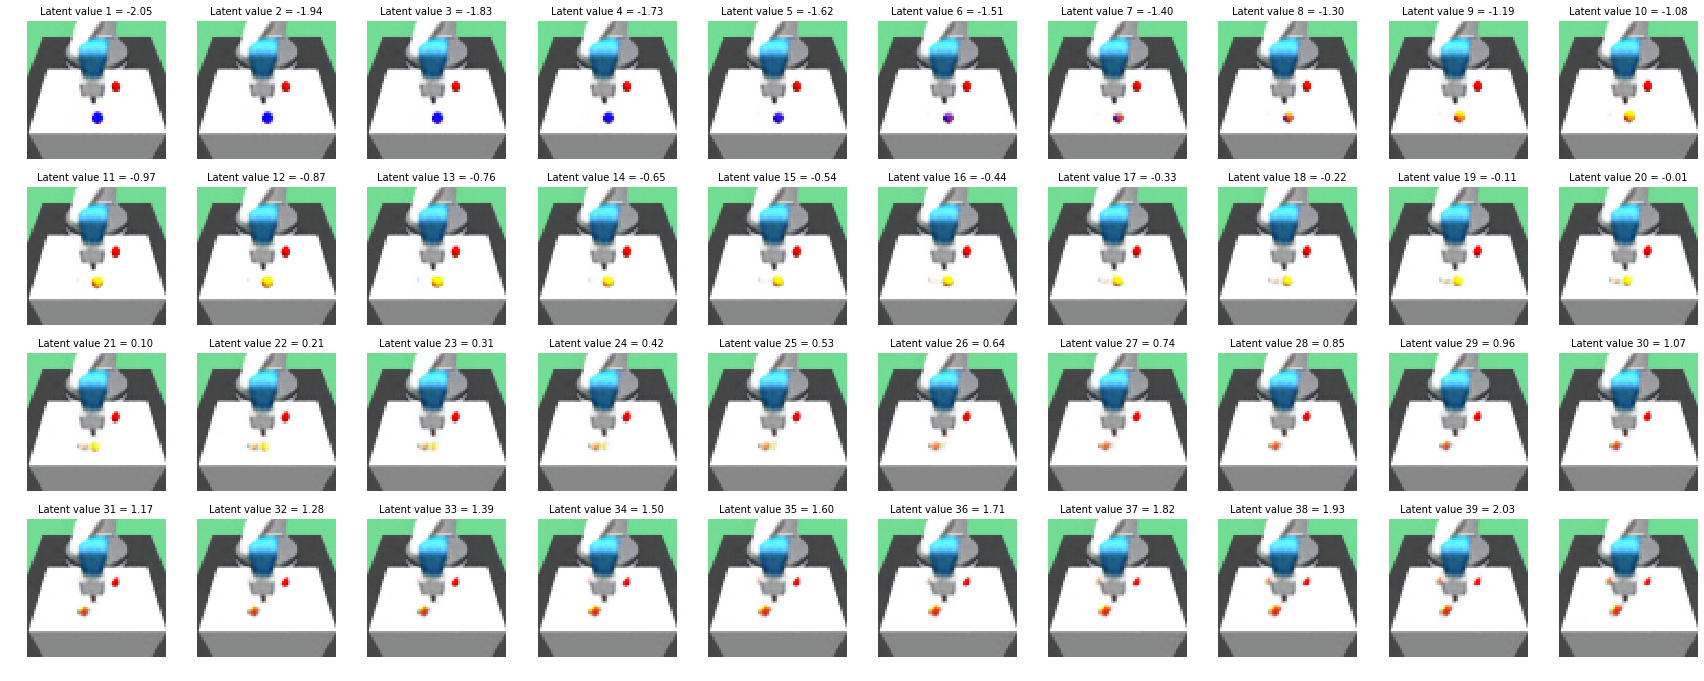

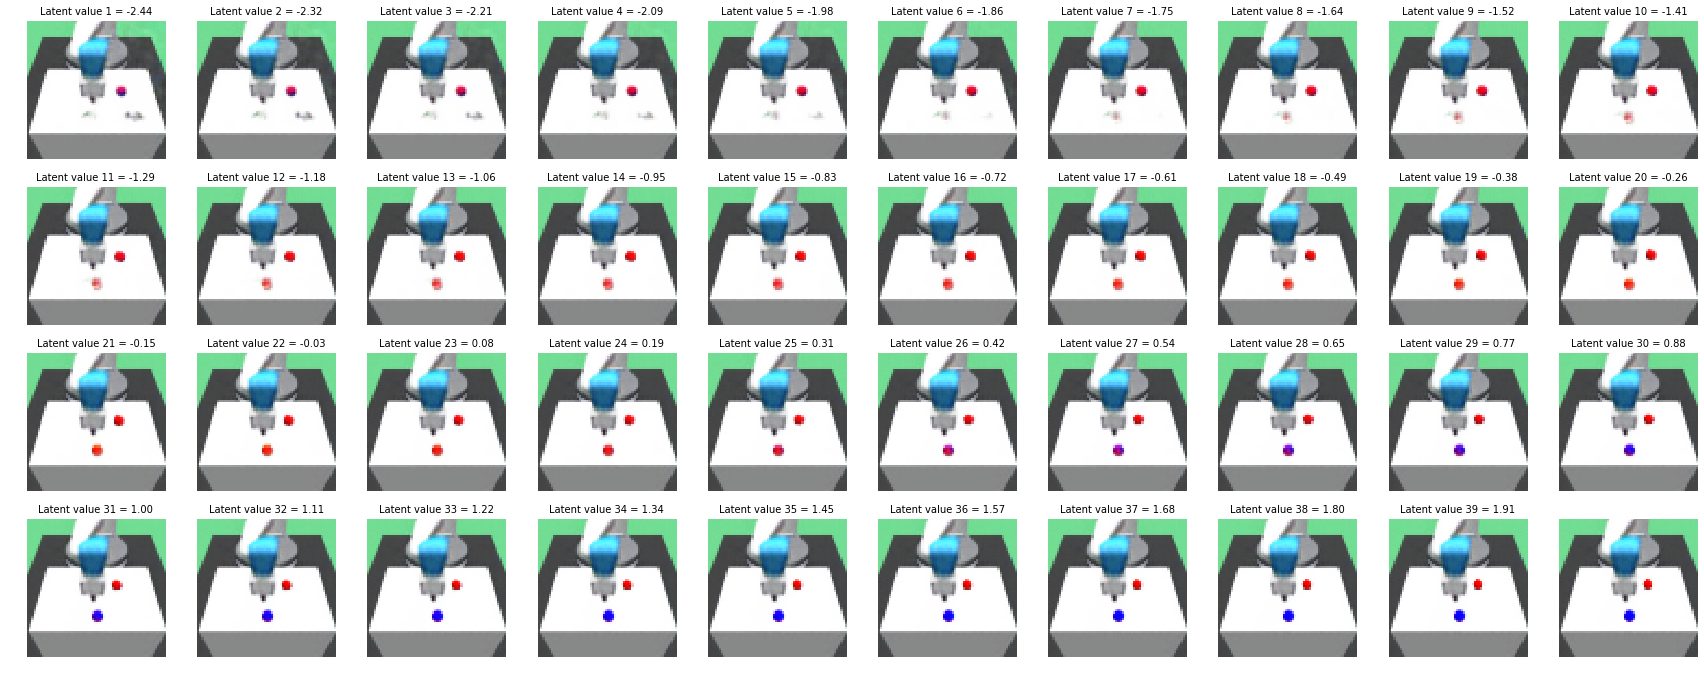

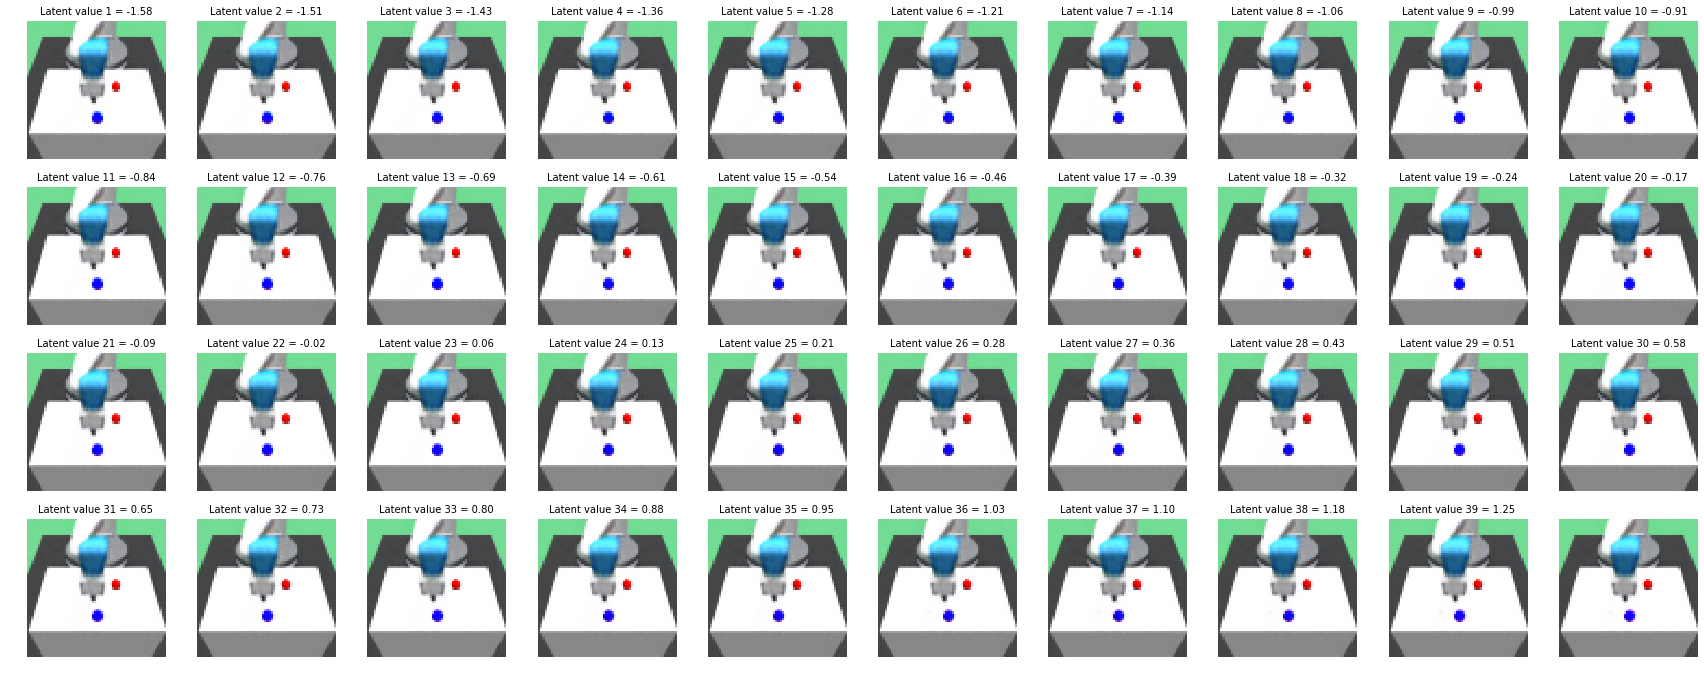

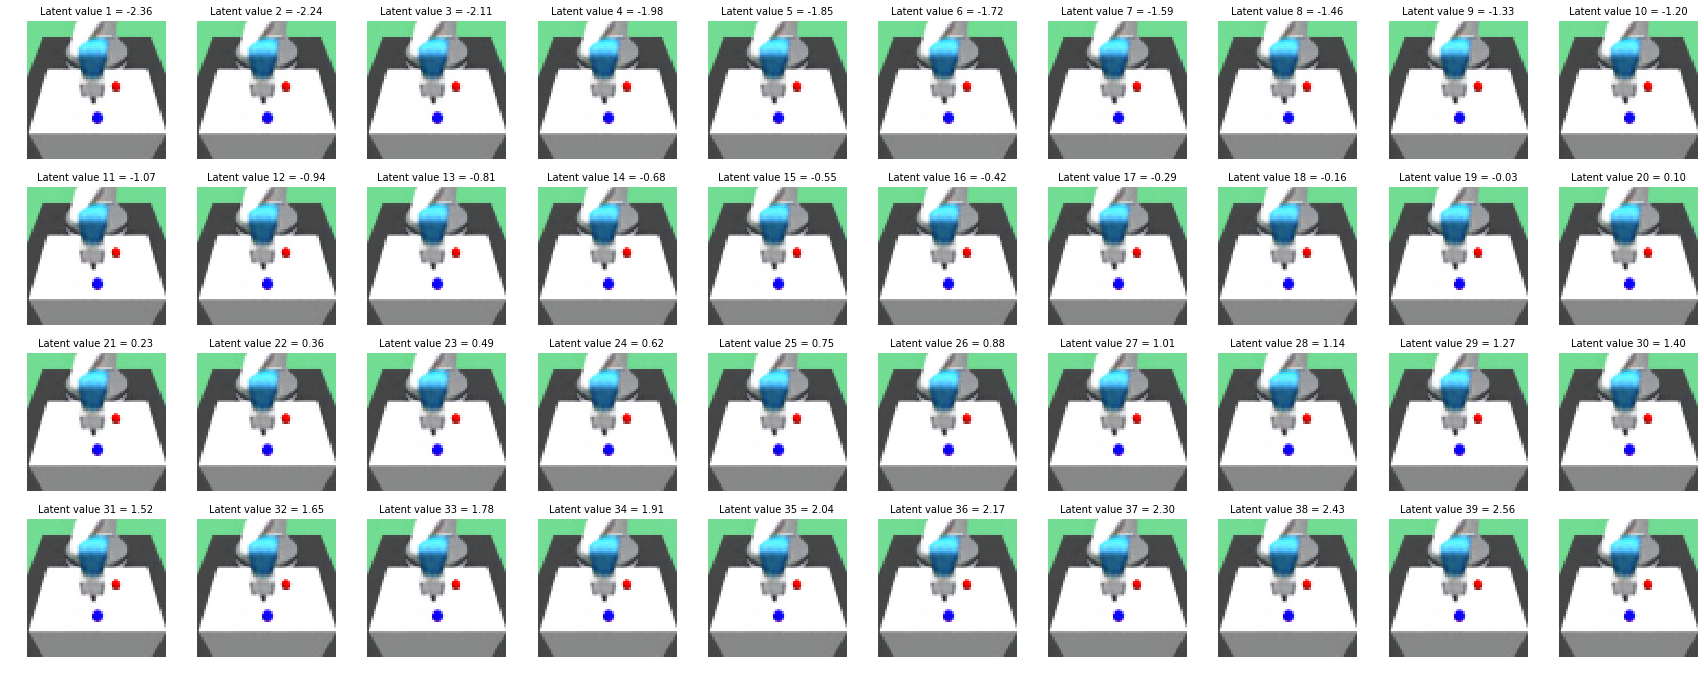

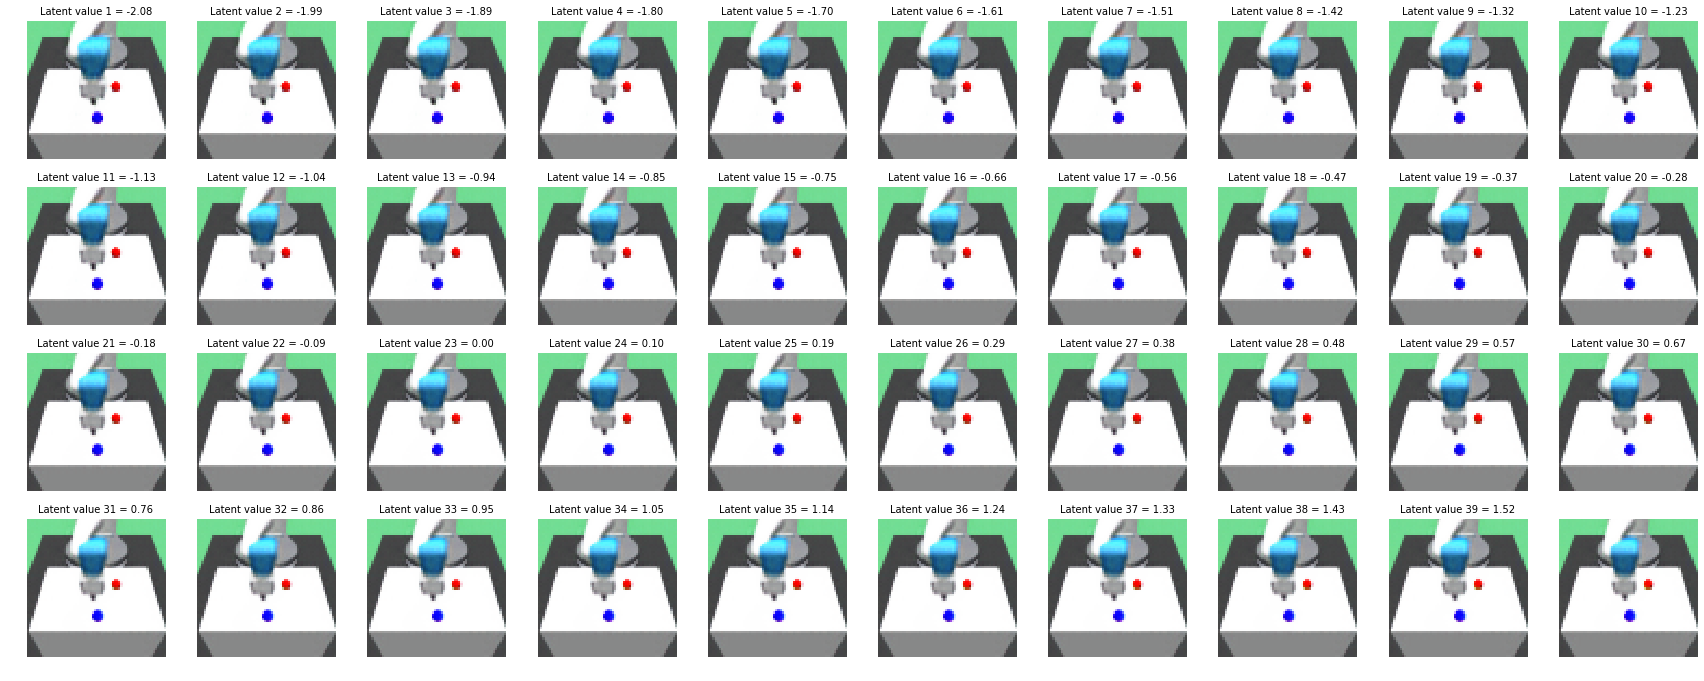

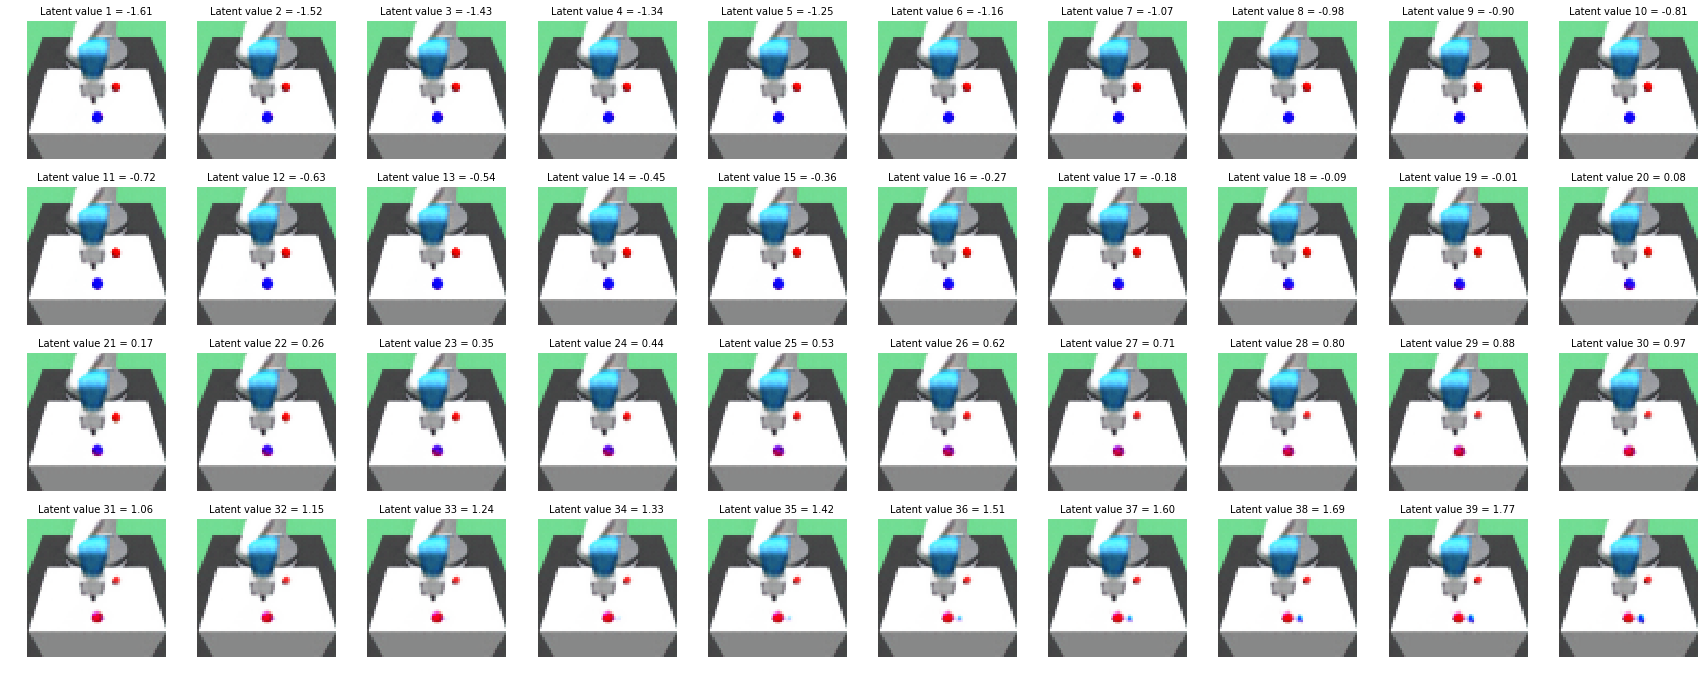

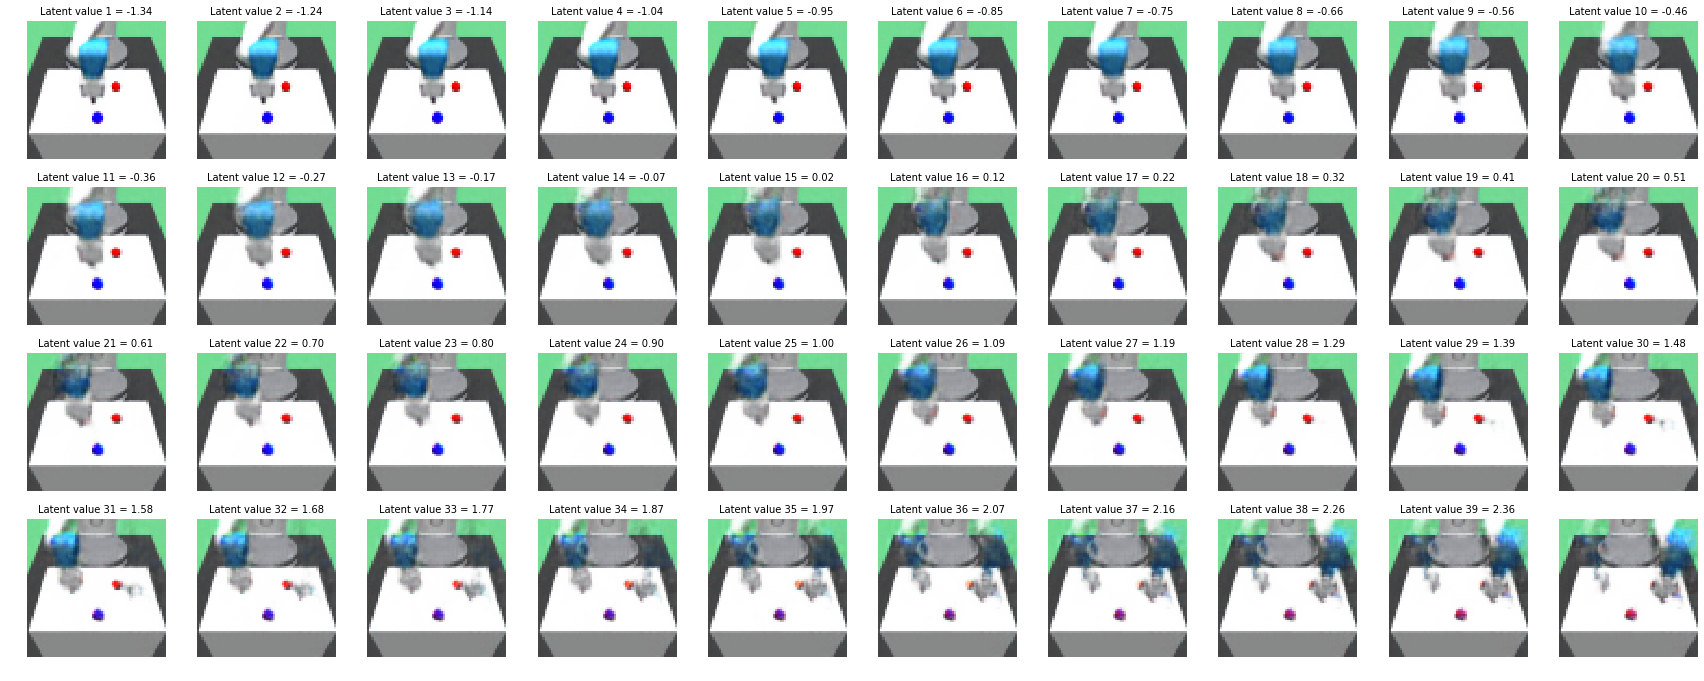

In [9]:
%matplotlib inline
pic_index = 2
z = vae.encode(dataset[:batch_size])
reconstruct = vae.decode(z)
pic = reconstruct[pic_index]
mins = np.min(z, axis=0)
maxes = np.max(z, axis=0)
originals = z[pic_index].copy()
latent_walk_length = 40
for i in range(z.shape[1]):
    fig = plt.figure(figsize=(30, 30))
    latent_walk = np.linspace(mins[i], maxes[i], latent_walk_length)
    for j, walk in enumerate(latent_walk):
        z[pic_index][i] = walk
        reconstruct = vae.decode(z)
        plt.title("Latent value {0:d} = {1:.2f}".format(j, walk), fontsize=10)
        plt.subplot(latent_walk_length/4, latent_walk_length/4, j+1)
        plt.axis('off')
        plt.imshow(reconstruct[pic_index])
        z[pic_index] = originals
    plt.savefig("disentaglement_check{}.pdf".format(i), format="pdf")
    # plt.show()
